#Task: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

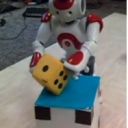

In [1]:
from IPython.display import Image
Image(filename='NAORelease.jpg')

**Reference:** (Color Quantization using K-Means)[http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html] 

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np
import types
from scipy.spatial.distance import cdist
import time

In [18]:
class KMeansClustering():
    
    def __init__(self, obj_name, using= 'sk_learn'):
        
        self._methods = {1: 'sk_learn', 2: 'own_implementation'}
        
        self.get_clustered_image = lambda image, using, K: eval(obj_name+'.'+using+'(image, K)')
        
    def get_data_and_dimensions(self, image):
        image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
        image = np.array(image, dtype=np.float64) / 255
        width, height = image.shape[0], image.shape[1]
        return image.reshape((width * height, 3)), width, height
        
    def sk_learn(self, image, K):
        
        start = time.time()
        print ('Running sk-learn implementation...! K is set to {}'.format(K))
        data, width, height = self.get_data_and_dimensions(image)
        
        kmeans = KMeans(n_clusters = K).fit(data)
        labels = kmeans.predict(data)

        codebook = kmeans.cluster_centers_
        return np.reshape(codebook[labels], (width, height, codebook.shape[1])), time.time() - start
    
    def own_implementation(self, image, K):
        
        start = time.time()
        print ('Running own implementation...! K is set to {}'.format(K))
        data, width, height = self.get_data_and_dimensions(image)
        
        centroids = np.random.uniform(0, 1, (K, 3))
        while(True):
            dist = cdist(data, centroids)
            assigned_cls = np.argmin(dist, axis=1) 
            centroids_prev = centroids.copy()

            for cls in np.arange(0, K, 1):
                data_indices_in_cls = np.argwhere(assigned_cls==cls)
                if data_indices_in_cls.size != 0:
                    centroids[cls] = np.mean(data[data_indices_in_cls], axis=0)

            centriods_change = np.subtract(centroids, centroids_prev)
            centriods_abs_change = np.abs(np.sum(centriods_change, axis=1))

            if np.all(centriods_abs_change < 1e-10):
                break
        
        # Predict....
        dist = cdist(data, centroids)
        assigned_cls = np.argmin(dist, axis=1) 

        recreated_data = data.copy()
        for cls in np.arange(0, K, 1):
            data_indices_in_cls = np.argwhere(assigned_cls==cls)
            recreated_data[data_indices_in_cls] = centroids[cls]
        
        return np.reshape(recreated_data, (width, height, centroids.shape[1])), time.time() - start

In [34]:
image = cv2.imread('./NAORelease.jpg', 1)

K = np.arange(0, 26, 2, dtype= np.uint8)
K = K[1:]

In [35]:
color_clustering = KMeansClustering('color_clustering')
color_clustering._methods

{1: 'sk_learn', 2: 'own_implementation'}

In [53]:
def run_and_plot_results(using, K):
    recreated_images = list()
    execution_times = list()

    for k in K:
        recreated_image, t = color_clustering.get_clustered_image(image, using, k)
        recreated_images.append(recreated_image)
        execution_times.append(t)

    plt.plot(K, execution_times)
    plt.scatter(K, execution_times)
    plt.title('Execution time for different Ks using {}'.format(using))
    plt.xlabel('K (Number of clusters)')
    plt.ylabel('Time in seconds')
    plt.show()

    figure = plt.figure()
    figure.set_figheight(15)
    figure.set_figwidth(13)

    for index, img in enumerate(recreated_images):
        figure.add_subplot(np.ceil(len(K)/4), 4, index+1)
        plt.title('K = {}'.format(K[index]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)

    plt.show()

Running sk-learn implementation...! K is set to 2
Running sk-learn implementation...! K is set to 4
Running sk-learn implementation...! K is set to 6
Running sk-learn implementation...! K is set to 8
Running sk-learn implementation...! K is set to 10
Running sk-learn implementation...! K is set to 12
Running sk-learn implementation...! K is set to 14
Running sk-learn implementation...! K is set to 16
Running sk-learn implementation...! K is set to 18
Running sk-learn implementation...! K is set to 20
Running sk-learn implementation...! K is set to 22
Running sk-learn implementation...! K is set to 24


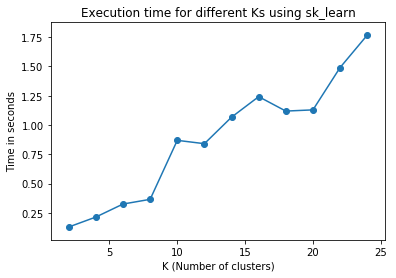

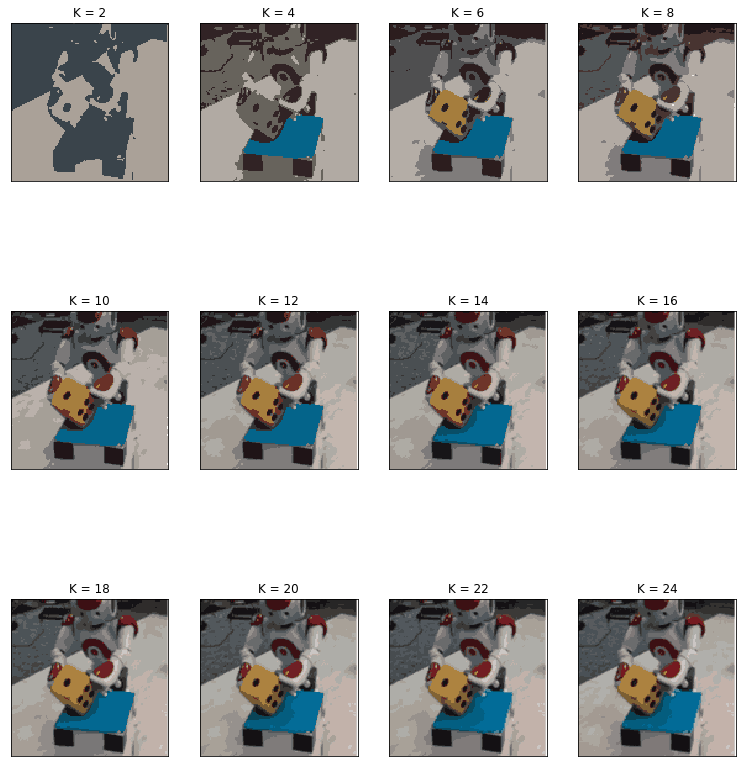

In [54]:
run_and_plot_results(color_clustering._methods[1], K)

Running own implementation...! K is set to 2
Running own implementation...! K is set to 4
Running own implementation...! K is set to 6
Running own implementation...! K is set to 8
Running own implementation...! K is set to 10
Running own implementation...! K is set to 12
Running own implementation...! K is set to 14
Running own implementation...! K is set to 16
Running own implementation...! K is set to 18
Running own implementation...! K is set to 20
Running own implementation...! K is set to 22
Running own implementation...! K is set to 24


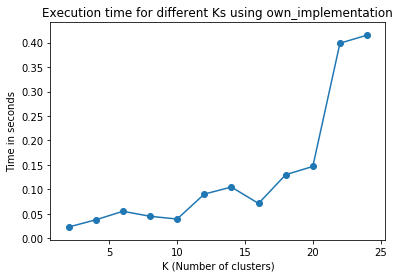

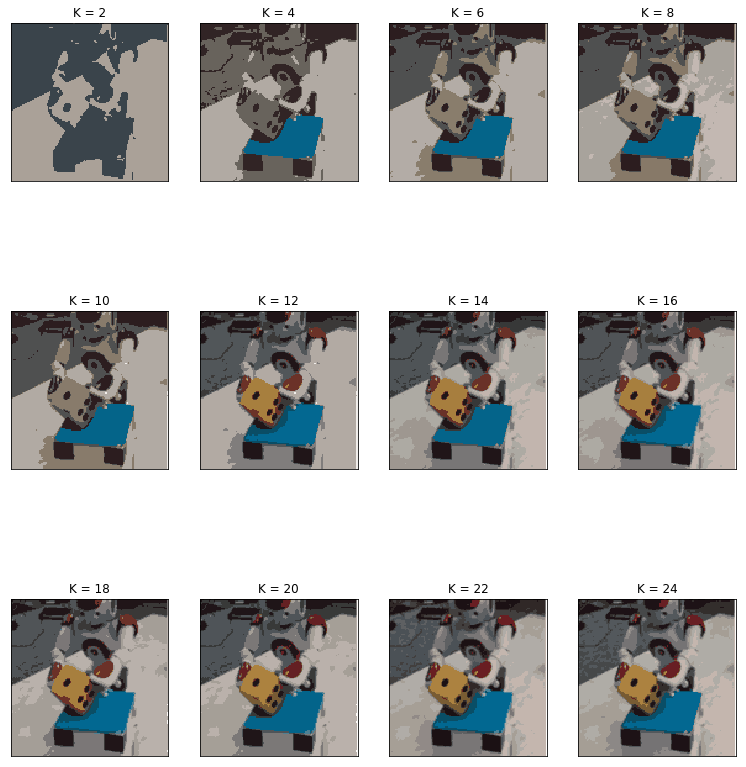

In [55]:
run_and_plot_results(color_clustering._methods[2], K)

In [56]:
def compare_results(method_1, method_2, K):
    recreated_images_m1 = list()
    execution_times_m1 = list()
    recreated_images_m2 = list()
    execution_times_m2 = list()

    for k in K:
        recreated_image_m1, t_m1 = color_clustering.get_clustered_image(image, method_1, k)
        recreated_images_m1.append(recreated_image_m1)
        execution_times_m1.append(t_m1)
        recreated_image_m2, t_m2 = color_clustering.get_clustered_image(image, method_2, k)
        recreated_images_m2.append(recreated_image_m2)
        execution_times_m2.append(t_m2)

    plt.plot(K, execution_times_m1, label= method_1)
    plt.scatter(K, execution_times_m1)
    plt.plot(K, execution_times_m2, label= method_2)
    plt.scatter(K, execution_times_m2)
    plt.title('Comparing execution time for different Ks')
    plt.xlabel('K (Number of clusters)')
    plt.ylabel('Time in seconds')
    plt.legend()
    plt.show()

    figure = plt.figure()
    figure.set_figheight(15)
    figure.set_figwidth(15)

    for index, (img_m1, img_m2) in enumerate(zip(recreated_images_m1, recreated_images_m2)):
        figure.add_subplot(np.ceil(len(K)/4)*2, 4, 2*index+1)
        plt.title('K = {} using {}'.format(K[index], method_1))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img_m1)
        figure.add_subplot(np.ceil(len(K)/4)*2, 4, 2*index+2)
        plt.title('K = {} using {}'.format(K[index], method_2))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img_m2)
    
    plt.tight_layout()
    plt.show()

Running sk-learn implementation...! K is set to 2
Running own implementation...! K is set to 2
Running sk-learn implementation...! K is set to 4
Running own implementation...! K is set to 4
Running sk-learn implementation...! K is set to 6
Running own implementation...! K is set to 6
Running sk-learn implementation...! K is set to 8
Running own implementation...! K is set to 8
Running sk-learn implementation...! K is set to 10
Running own implementation...! K is set to 10
Running sk-learn implementation...! K is set to 12
Running own implementation...! K is set to 12
Running sk-learn implementation...! K is set to 14
Running own implementation...! K is set to 14
Running sk-learn implementation...! K is set to 16
Running own implementation...! K is set to 16
Running sk-learn implementation...! K is set to 18
Running own implementation...! K is set to 18
Running sk-learn implementation...! K is set to 20
Running own implementation...! K is set to 20
Running sk-learn implementation...! K 

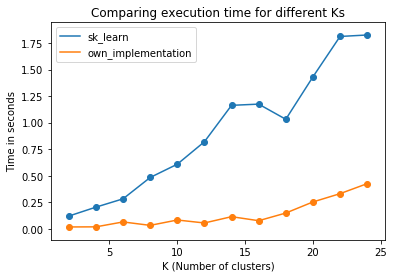

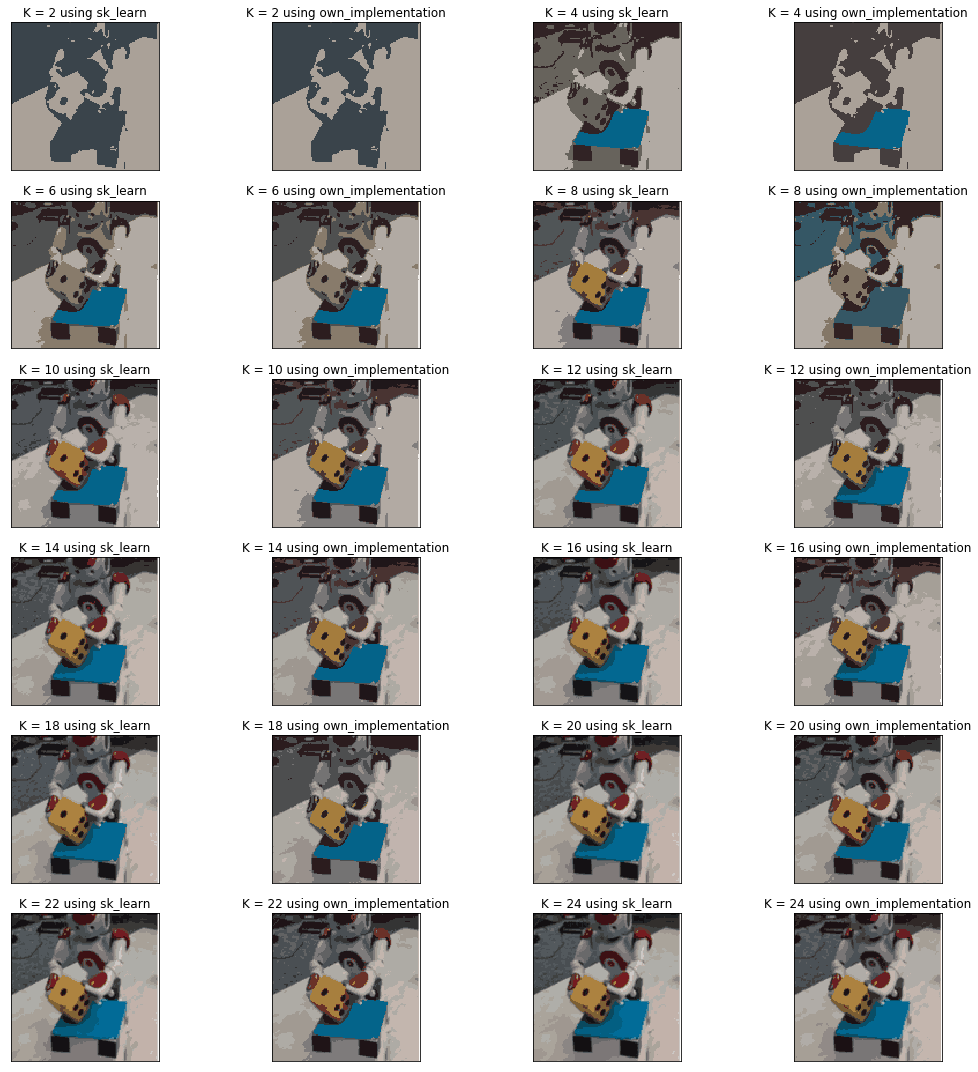

In [57]:
compare_results(color_clustering._methods[1], color_clustering._methods[2], K)